In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Using the Pandas package, create a table of the distribution of the qualitative variable in the dataset, which should have the following structure:
- rows should represent individual categories;
- columns:
    - category name,
    - count,
    - percentage (rounded to two decimal places).

In [68]:
headers = ["sex", "length", "diameter", "height", "whole weight", "shucked weight", "viscera weight", "shell weight",
           "rings"]
data = pd.read_csv("data.csv", sep=',', names=headers)

qual_distr = pd.DataFrame(columns=["count", "%"])
male = data["sex"].value_counts().get('M', 0)
female = data["sex"].value_counts().get('F', 0)
infant = data.shape[0] - male - female
all_together = male + female + infant

qual_distr.loc[0] = [male, round((male / all_together) * 100, 2) ] # loc access a row by label
qual_distr.loc[1] = [infant, round((infant / all_together) * 100 , 2)]
qual_distr.loc[2] = [female, round((female / all_together )* 100 , 2)]
qual_distr.index = {"Male", "Infant", "Female"}
display(qual_distr)



,count,%
Infant,1528.0,36.58
Female,1342.0,32.13
Male,1307.0,31.29


2. Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset, which should have the following structure:
- rows should represent individual variables;
- columns:
    - variable name,
    - arithmetic mean,
    - standard deviation,
    - minimum value,
    - 1st quartile,
    - 2nd quartile (median),
    - 3rd quartile,
    - maximum value.

In [69]:
quan_distr = pd.DataFrame(columns=["mean", "std", "min", "25%", "50%", "75%", "max"])
for x in range(1, len(headers)):
    temp_data = data[headers[x]]
    table_col = [temp_data.mean(), temp_data.std(), temp_data.min(), temp_data.quantile(0.25), temp_data.quantile(0.5), temp_data.quantile(0.75), temp_data.max()]
    quan_distr.loc[x - 1] = table_col
quan_distr.index = {"length", "diameter", "height", "whole weight", "shucked weight", "viscera weight", "shell weight", "rings"}
display(quan_distr)

,mean,std,min,25%,50%,75%,max
whole weight,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
rings,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
viscera weight,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
length,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shell weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
diameter,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
height,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
shucked weight,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


3. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a bar chart of the counts of occurrences of each category for the qualitative variable in the dataset.

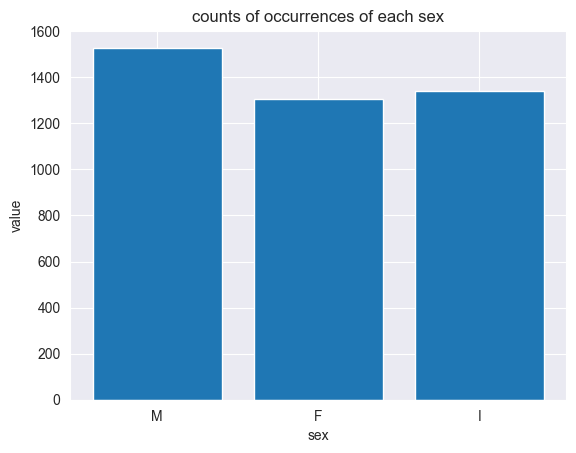

In [70]:
plt.bar(["M", "F", "I"], [male, female, infant])
plt.xlabel("sex")
plt.ylabel("value")
plt.title("counts of occurrences of each sex")
plt.show()

4. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure spanning 4 rows and 2 columns.


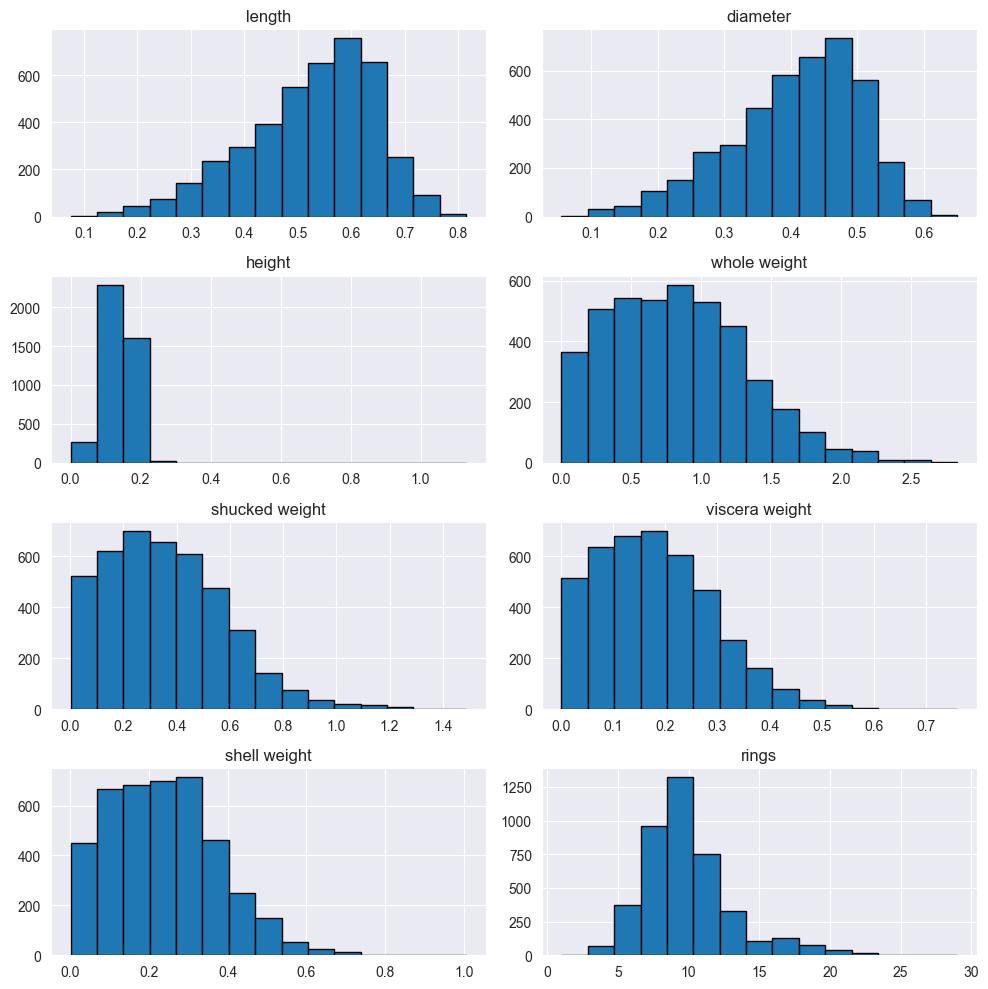

In [71]:
plt.subplots(4, 2, figsize=(10, 10))
for x in range(1, len(headers)):
    plt.subplot(4, 2, x)
    plt.hist(data[headers[x]],bins=15, edgecolor='black')
    plt.title(headers[x])
plt.tight_layout() # Adjust the padding between and around subplots
plt.show()

5. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a scatter plot for each pair of the quantitative variables in the dataset. All scatter plots should be placed in a single figure spanning 14 rows and 2 columns.

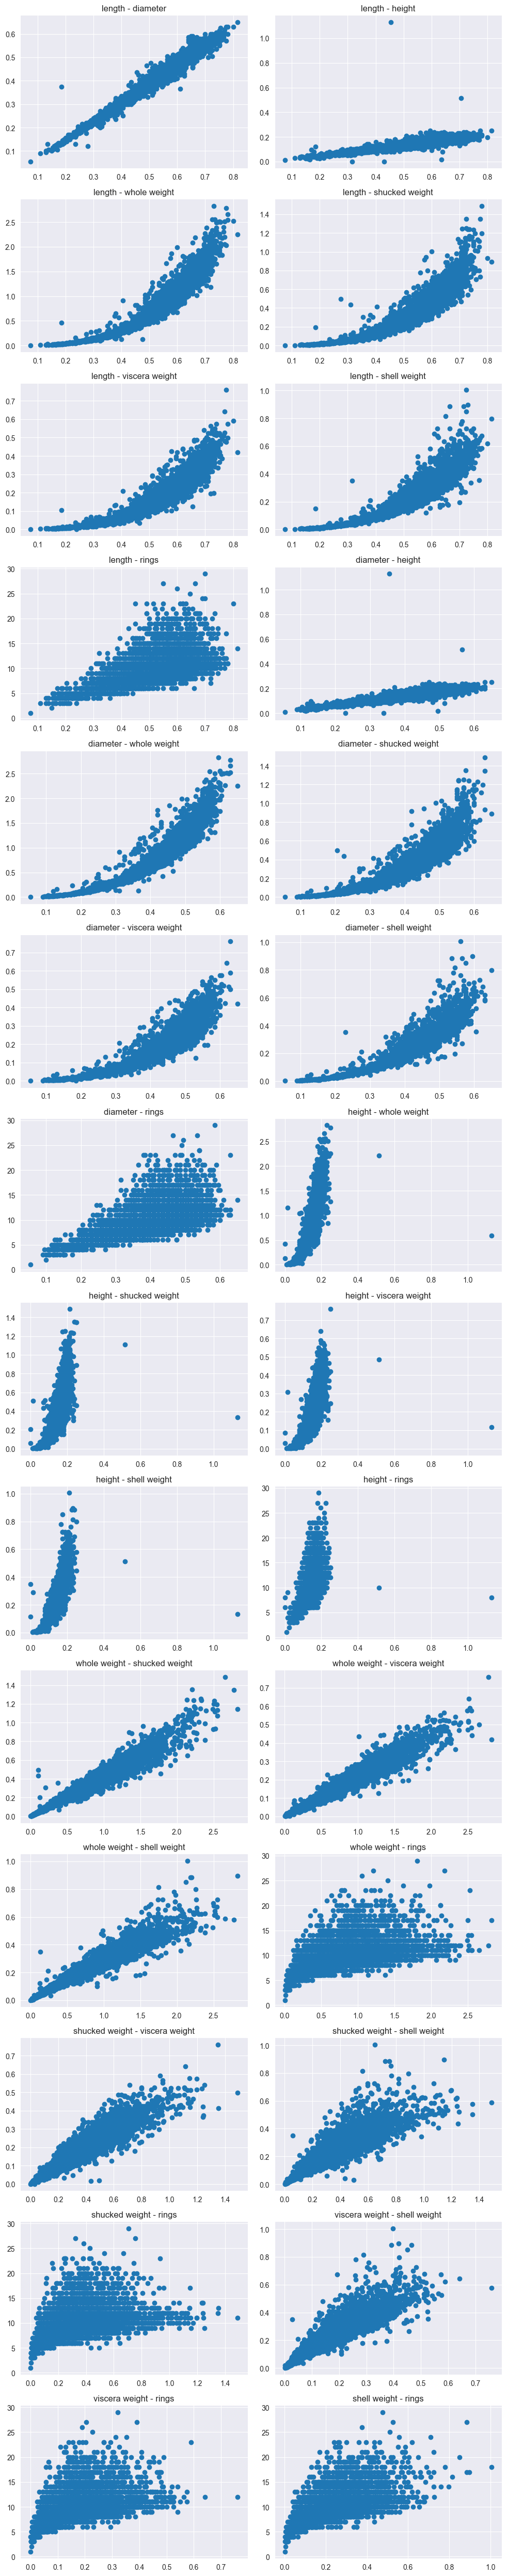

In [72]:
plt.subplots(14, 2, figsize=(10, 50))
index = 1
for x in range(1, len(headers) - 1):
    for y in range(x + 1, len(headers)):
        plt.subplot(14, 2, index)
        plt.scatter(data[headers[x]], data[headers[y]])
        plt.title(headers[x] + " - " + headers[y])
        index += 1
plt.tight_layout() # Adjust the padding between and around subplots
plt.show()

6. Using the Pandas package, create a table representing a linear correlation matrix of all quantitative variables in the dataset.

In [73]:
corr_matrix = data[data.columns[1:]].corr()
display(corr_matrix)

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


7. Using the Seaborn package, create a heatmap representing a linear correlation matrix of all quantitative variables in the dataset.

<Axes: >

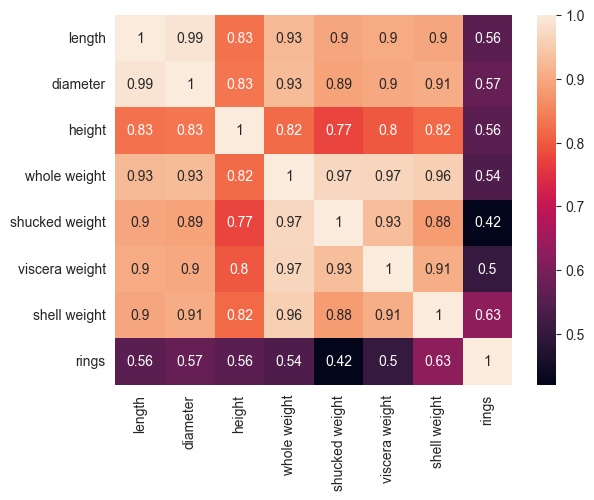

In [74]:
heatmap = sns.heatmap(corr_matrix, annot=True)
display(heatmap)

8. Using the Seaborn package, create a linear regression plot with the two quantitative variables that are most strongly linearly correlated (the variables may be hardcoded).

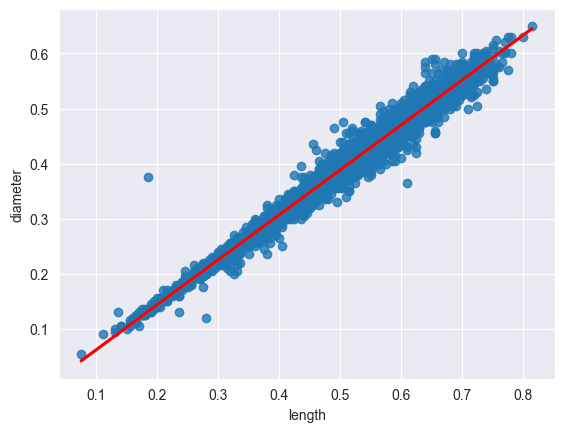

In [75]:
sns.regplot(x=data["length"], y=data["diameter"],line_kws={"color": "red"})
plt.show()

Requirements for the maximum grade of 5.0:

- 1. All requirements for the maximum grade of 4 should be satisfied.

- 2. Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable, which should have the following structure:
    - rows should represent combinations of individual quantitative variables and individual categories of the qualitative variable;
    - columns:
        - quantitative variable name,
        - qualitative variable category name,
        - arithmetic mean,
        - standard deviation,
        - minimum value,
        - 1st quartile,
        - 2nd quartile (median),
        - 3rd quartile,
        - maximum value.

In [76]:
grouped = data.groupby('sex') # group rows of data based on the value in column 'sex'
quan_distr_by_cat = pd.DataFrame(columns=["sex", "mean", "std", "min", "25%", "50%", "75%", "max"])
y = 0
index_labels = []
for x in range(1, len(headers)):
    for name, group in grouped:
        temp_data = group[headers[x]]
        table_col = [name, temp_data.mean(), temp_data.std(), temp_data.min(), temp_data.quantile(0.25), temp_data.quantile(0.5), temp_data.quantile(0.75), temp_data.max()]
        quan_distr_by_cat.loc[y + x - 1] = table_col
        index_labels.append(headers[x])
        y += 1
quan_distr_by_cat.set_index(pd.Index(index_labels), inplace= True)
quan_distr_by_cat.index.name = 'Feature'
display(quan_distr_by_cat)




,sex,mean,std,min,25%,50%,75%,max
Feature,,,,,,,,
length,F,0.579093,0.086160,0.2750,0.525000,0.59000,0.640000,0.8150
length,I,0.427746,0.108858,0.0750,0.360000,0.43500,0.510000,0.7250
length,M,0.561391,0.102697,0.1550,0.505000,0.58000,0.630000,0.7800
diameter,F,0.454732,0.070954,0.1950,0.410000,0.46500,0.505000,0.6500
diameter,I,0.326494,0.088109,0.0550,0.270000,0.33500,0.390000,0.5500
diameter,M,0.439287,0.084398,0.1100,0.395000,0.45500,0.500000,0.6300
height,F,0.158011,0.039984,0.0150,0.140000,0.16000,0.175000,1.1300
height,I,0.107996,0.031995,0.0000,0.085000,0.11000,0.130000,0.2200
height,M,0.151381,0.034804,0.0250,0.130000,0.15500,0.175000,0.5150


- 3. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a boxplot of each quantitative variable in the dataset, grouping every one of them by the qualitative variable. All boxplots should be placed in a single figure spanning 4 rows and 2 columns.

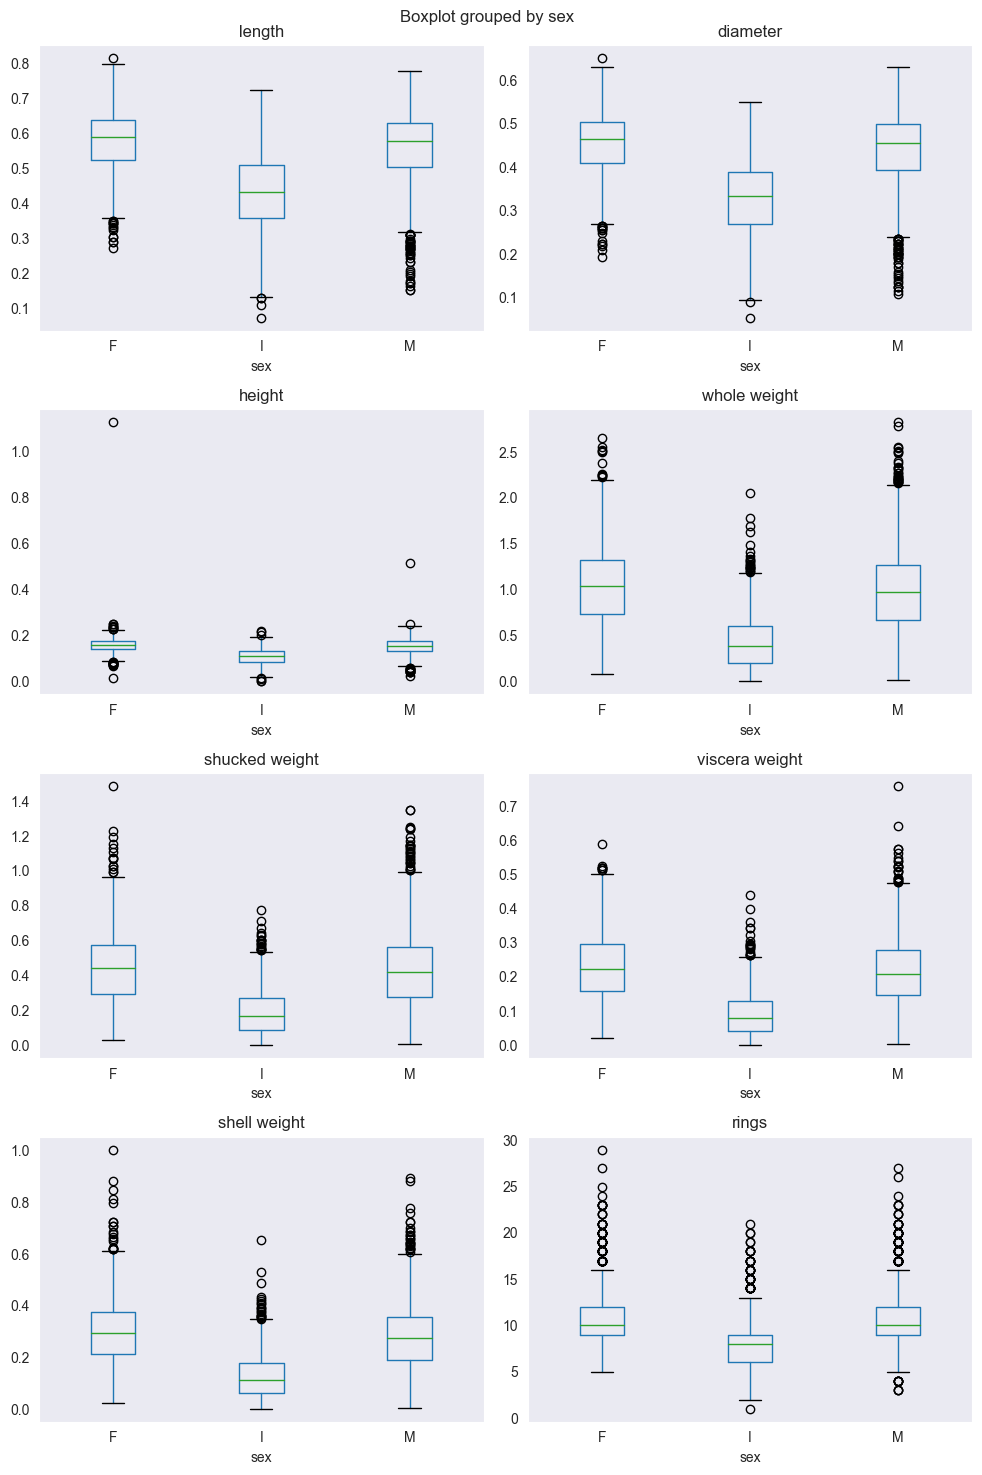

In [77]:
fig, axes = plt.subplots(4, 2, figsize=(10, 15)) # The axes variable is 2D tables that references each of 8 subplots

for x in range(1, len(headers)):
    row, col = divmod(x - 1, 2)  # both integer division and modulo operation simultaneously on the value to
                                 # calculate the row and column for the subplot

    ax = axes[row, col]

    data.boxplot(column=headers[x], by=headers[0], grid=False, ax=ax)
    ax.set_title(headers[x])

plt.tight_layout() # Adjust the padding between and around subplots
plt.show()

